In [1]:
# Alexander Ly 027744520
# CECS 451 Sec 01
# Assignment 6 -Decision Tree
# April 19, 2024

# Part A
import sklearn as sklearn
from sklearn.datasets import load_breast_cancer

In [2]:
# Part B

# load our dataset 
data = load_breast_cancer()
X= data.data
y = data.target

#output
print("Feature Names (X): ", data.feature_names)
print("Target Names (y): ", data.target_names)

Feature Names (X):  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names (y):  ['malignant' 'benign']


In [3]:
# Part C
from sklearn.model_selection import train_test_split

# split data evenly between testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, train_size=0.5)

In [4]:
# Part G
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

# create decisiontree with entropy index and max depth of trees set to 2
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

# run decision tree with our training data
clf.fit(X_train, y_train)

# predict y_pred using x_test
y_pred = clf.predict(X_test)

# get accuracy by comparing y_pred and y_test
acc = accuracy_score(y_pred, y_test)

# get confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

# output
print("Accuracy: ", acc)
print("Confusion Matrix: ")
print(conf_matrix)

Accuracy:  0.8947368421052632
Confusion Matrix: 
[[ 81   9]
 [ 21 174]]


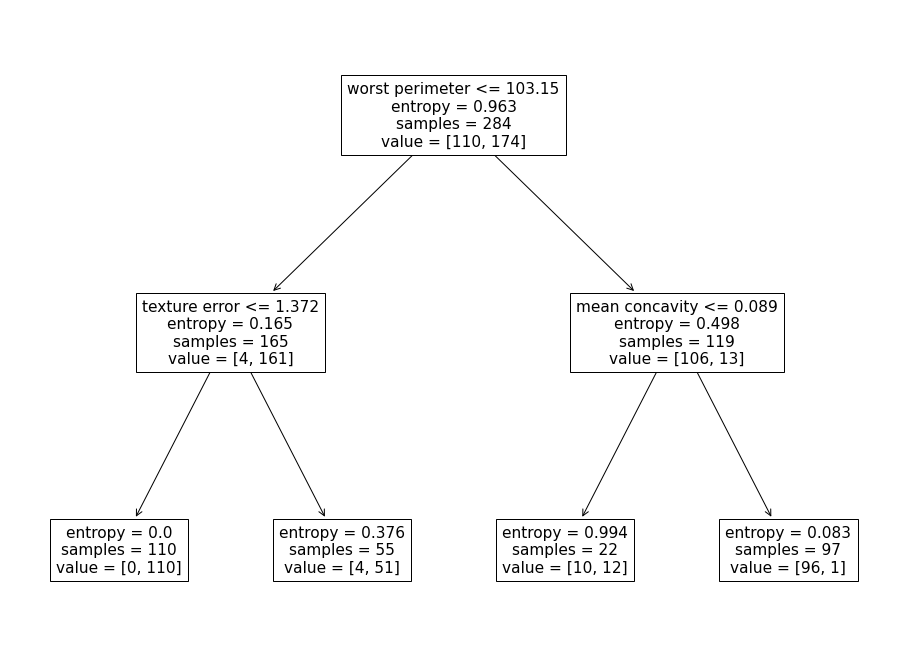

In [5]:
# Part H
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# create plot tree showing feature names 
plt.figure(figsize=(16, 12))
plot_tree(clf, feature_names=data.feature_names)
plt.show()

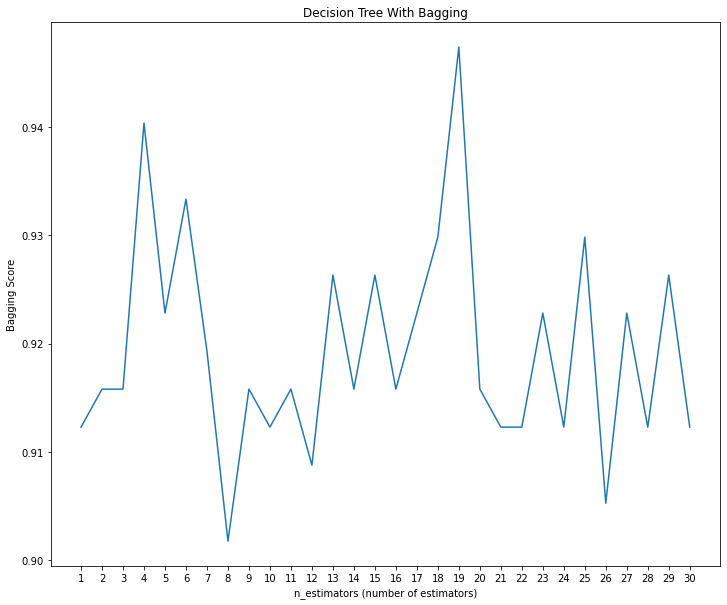

In [6]:
# Part I
from sklearn.ensemble import BaggingClassifier

# list for storing bagging score
bagging_scores = []

# Run multiple decision trees and calculate the prediction accuracy
for i in range(1, 31):
    bagging_class = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2), 
                                      n_estimators=i)
    bagging_class.fit(X_train, y_train)
    prediction_acc = bagging_class.score(X_test, y_test)
    bagging_scores.append(prediction_acc)

# plot output
plt.figure(figsize=(12, 10))
plt.plot(range(1,31), bagging_scores)
plt.title("Decision Tree With Bagging")
plt.xlabel("n_estimators (number of estimators)")
plt.ylabel("Bagging Score")
plt.xticks(range(1,31))
plt.show()

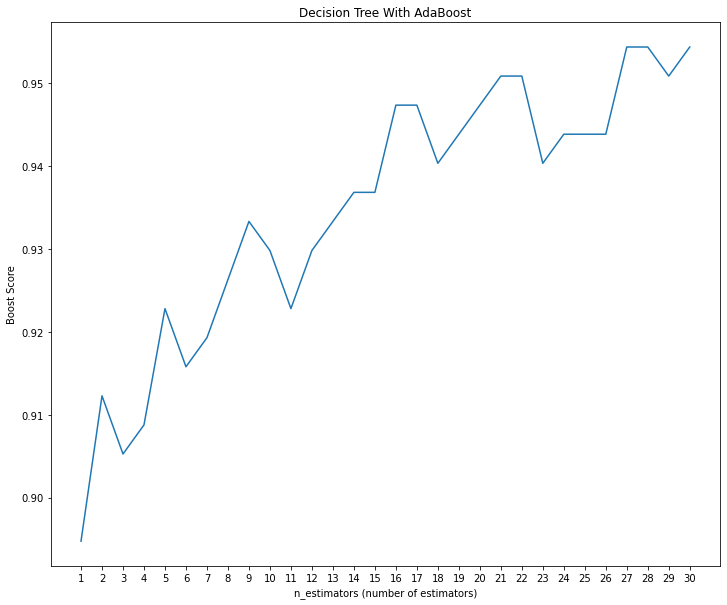

In [7]:
# Part J
from sklearn.ensemble import AdaBoostClassifier

# list for storing adaboost scores
boost_scores = []

# Run multiple decision trees and calculate the prediction accuracy
for i in range(1, 31): 
    ada_class = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy', max_depth=2),
                                        n_estimators=i)
    ada_class.fit(X_train, y_train)
    prediction_acc = ada_class.score(X_test, y_test)
    boost_scores.append(prediction_acc)

# plot output
plt.figure(figsize=(12, 10))
plt.plot(range(1,31), boost_scores)
plt.title("Decision Tree With AdaBoost")
plt.xlabel("n_estimators (number of estimators)")
plt.ylabel("Boost Score")
plt.xticks(range(1,31))
plt.show()

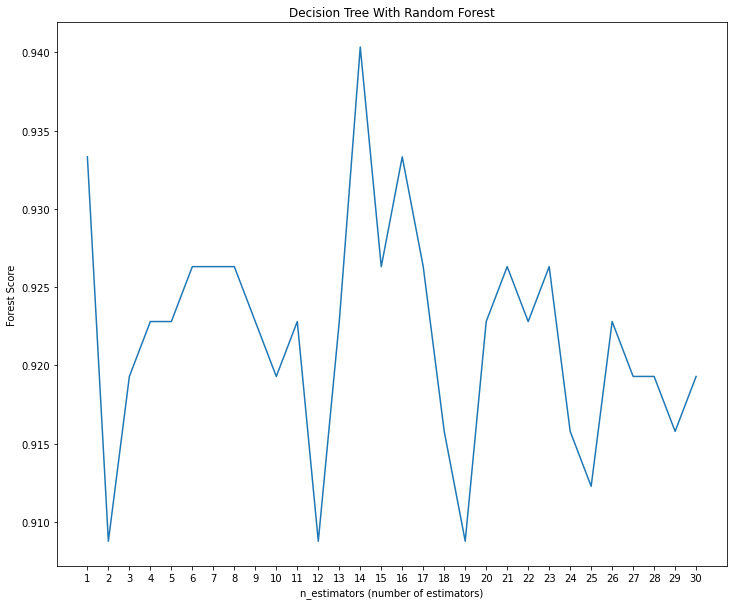

In [9]:
# Part K
from sklearn.ensemble import RandomForestClassifier

# list for storing random forest scores
forest_scores = []

# Run multiple decision trees and calculate the prediction accuracy
for i in range(1, 31):  
    rf_class = RandomForestClassifier(n_estimators=100, max_features=i,
                                           criterion='entropy', max_depth=2)
    rf_class.fit(X_train, y_train)
    prediction_acc = rf_class.score(X_test, y_test)
    forest_scores.append(prediction_acc)

# plot output
plt.figure(figsize=(12, 10))
plt.plot(range(1, 31), forest_scores)
plt.title("Decision Tree With Random Forest")
plt.xlabel("n_estimators (number of estimators)")
plt.ylabel("Forest Score")
plt.xticks(range(1, 31))  
plt.show()